### MinMax scaling, L2 regularization

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Input,BatchNormalization,Dropout, Conv2D, MaxPooling2D

df = pd.read_csv('./train.csv')

df_scaled = df
scale_cols = df_scaled[df_scaled.columns.difference(['leaktype'])].columns

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled, columns=scale_cols)

df_scaled['leaktype'] = df['leaktype'].values 

feature_df = df_scaled[df_scaled.columns.difference(['leaktype'])]
label_df = df_scaled['leaktype']

label_df = label_df.replace('other', 0)
label_df = label_df.replace('noise', 1)
label_df = label_df.replace('normal', 2)
label_df = label_df.replace('in', 3)
label_df = label_df.replace('out', 4)

feature_np = feature_df.to_numpy().astype('float32')
label_np = label_df.to_numpy().astype('float32')

s = np.arange(len(feature_np))

np.random.shuffle(s)

feature_np = feature_np[s]
label_np = label_np[s]

split = 0.2

test_num = int(split*len(label_np))

x_test = feature_np[0:test_num]
y_test = label_np[0:test_num]

x_train = feature_np[test_num:]
y_train = label_np[test_num:]

#ont-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)

In [3]:
model = Sequential()

model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='elu', kernel_regularizer='l2'))
model.add(BatchNormalization())
#output layer number of class = 5
model.add(Dense(5, activation='softmax')) 

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), 
              loss='categorical_crossentropy', metrics=['accuracy', tfa.metrics.F1Score(5, average='macro')])

In [5]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_train, y_train, epochs=200, validation_data = (x_test, y_test))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

2022-07-08 10:35:17.428744: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
 37/840 [>.............................] - ETA: 3s - loss: 2.0760 - accuracy: 0.5591 - f1_score: 0.3140 

2022-07-08 10:35:18.774631: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


840/840 [==============================] - 6s 5ms/step - loss: 1.1846 - accuracy: 0.6349 - f1_score: 0.3205 - val_loss: 1.1252 - val_accuracy: 0.6551 - val_f1_score: 0.2901
Epoch 2/200
840/840 [==============================] - 4s 5ms/step - loss: 1.0874 - accuracy: 0.6369 - f1_score: 0.2801 - val_loss: 0.9501 - val_accuracy: 0.6838 - val_f1_score: 0.3427
Epoch 3/200
840/840 [==============================] - 4s 5ms/step - loss: 1.0966 - accuracy: 0.6328 - f1_score: 0.2798 - val_loss: 0.9967 - val_accuracy: 0.6497 - val_f1_score: 0.2691
Epoch 4/200
840/840 [==============================] - 4s 5ms/step - loss: 1.1054 - accuracy: 0.6292 - f1_score: 0.2624 - val_loss: 1.0047 - val_accuracy: 0.6708 - val_f1_score: 0.2839
Epoch 5/200
840/840 [==============================] - 4s 5ms/step - loss: 1.0939 - accuracy: 0.6331 - f1_score: 0.2622 - val_loss: 1.0614 - val_accuracy: 0.6408 - val_f1_score: 0.2634
Epoch 6/200
840/840 [==============================] - 4s 5ms/step - loss: 1.0907 - acc

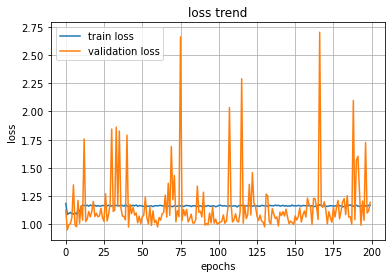

In [6]:
import matplotlib.pyplot as plt

plt.title('loss trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

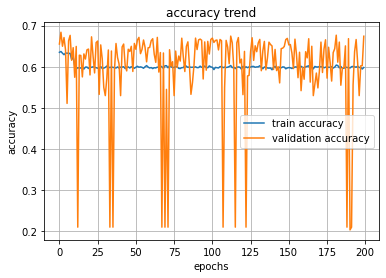

In [7]:
plt.title('accuracy trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

### overfitting을 막으려고 dropout 비율을 높이고, 정규화를 진행하면 학습이 아예 진행이 안됨

### Convolution layer로 학습 진행

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Input, BatchNormalization,Dropout, Conv1D, MaxPooling1D

df = pd.read_csv('./train.csv')

df_scaled = df
scale_cols = df_scaled[df_scaled.columns.difference(['leaktype'])].columns

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled, columns=scale_cols)

df_scaled['leaktype'] = df['leaktype'].values 

feature_df = df_scaled[df_scaled.columns.difference(['leaktype'])]
label_df = df_scaled['leaktype']

label_df = label_df.replace('other', 0)
label_df = label_df.replace('noise', 1)
label_df = label_df.replace('normal', 2)
label_df = label_df.replace('in', 3)
label_df = label_df.replace('out', 4)

feature_np = feature_df.to_numpy().astype('float32')
label_np = label_df.to_numpy().astype('float32')

s = np.arange(len(feature_np))

np.random.shuffle(s)

feature_np = feature_np[s]
label_np = label_np[s]

split = 0.2

test_num = int(split*len(label_np))

x_test = feature_np[0:test_num]
y_test = label_np[0:test_num]

x_train = feature_np[test_num:]
y_train = label_np[test_num:]

#ont-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)

In [18]:
x_test.shape

(6720, 513, 1)

In [19]:
x_train.shape

(26880, 513, 1)

In [20]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)

In [21]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [25]:
model = Sequential()

model.add(Conv1D(input_shape=(x_train.shape[1],1), kernel_size=32, filters=32, activation='relu', padding='same'))
model.add(Conv1D(kernel_size=32, filters=64, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=4, padding='same'))
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax')) 

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), 
              loss='categorical_crossentropy', metrics=['accuracy', tfa.metrics.F1Score(5, average='macro')])

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 513, 32)           1056      
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 513, 64)           65600     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 129, 64)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8256)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 8256)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1056896   
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)              

In [27]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_train, y_train, epochs=300, validation_data = (x_test, y_test))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/300
840/840 [==============================] - 7s 8ms/step - loss: 2.8343 - accuracy: 0.6614 - f1_score: 0.3457 - val_loss: 1.9083 - val_accuracy: 0.6775 - val_f1_score: 0.3042
Epoch 2/300
840/840 [==============================] - 7s 8ms/step - loss: 1.8661 - accuracy: 0.6765 - f1_score: 0.3501 - val_loss: 2.2014 - val_accuracy: 0.6707 - val_f1_score: 0.3344
Epoch 3/300
840/840 [==============================] - 7s 8ms/step - loss: 1.7265 - accuracy: 0.6807 - f1_score: 0.3508 - val_loss: 1.7482 - val_accuracy: 0.6969 - val_f1_score: 0.3209
Epoch 4/300
840/840 [==============================] - 7s 8ms/step - loss: 2.8345 - accuracy: 0.6765 - f1_score: 0.3433 - val_loss: 2.4323 - val_accuracy: 0.6897 - val_f1_score: 0.2987
Epoch 5/300
840/840 [==============================] - 7s 8ms/step - loss: 2.0119 - accuracy: 0.6810 - f1_score: 0.3512 - val_loss: 1.7561 - val_accuracy: 0.6900 - val_f1_score: 0.3218
Epoch 6/300
840/840 [==============================] - 7s 8ms/step - loss: 

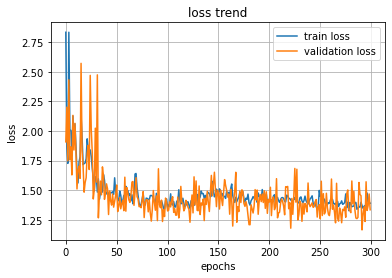

In [30]:
import matplotlib.pyplot as plt

plt.title('loss trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

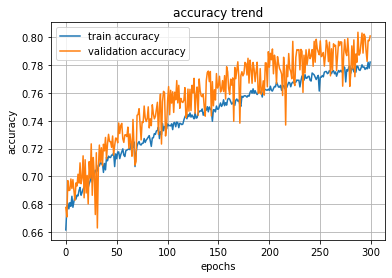

In [29]:
plt.title('accuracy trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

### Dense layer에는 1차원을 input으로 줘야 하기 때문에 flatten을 해줘야 함
### 전체 데이터를 대상으로 convolution 연산을 진행하면 dense layer만으로 구성된 모델보다 학습이 진행되지 않음
### 데이터셋을 나눠 각각 convolution 연산을 한 후 합치는 방식으로 진행해야겠음